#### Procesamiento Digital de Señales

# Tarea Semanal 6

#### Por Nahuel Braian Contreras

### Ventanas
Graficaremos el espectro de las distintas ventanas de manera normalizada(lóbulo principal con 0db), a fin de ver sus diferencias. Utilizaremos zeropadding para poder distinguir los lobulos caracteristicos del kernel

C:\Users\Nahuel\AppData\Local\Temp\ipykernel_25428\868863352.py:31: RuntimeWarning: divide by zero encountered in log10
  fft_Rectangular_log = 20*np.log10(np.abs(fft_Rectangular)/abs(fft_Rectangular[0]))
C:\Users\Nahuel\AppData\Local\Temp\ipykernel_25428\868863352.py:32: RuntimeWarning: divide by zero encountered in log10
  fft_Bartlett_log = 20*np.log10(np.abs(fft_Bartlett)/abs(fft_Bartlett[0]))
C:\Users\Nahuel\AppData\Local\Temp\ipykernel_25428\868863352.py:33: RuntimeWarning: divide by zero encountered in log10
  fft_Hann_log = 20*np.log10(np.abs(fft_Hann)/abs(fft_Hann[0]))
C:\Users\Nahuel\AppData\Local\Temp\ipykernel_25428\868863352.py:34: RuntimeWarning: divide by zero encountered in log10
  fft_Blackman_log = 20*np.log10(np.abs(fft_Blackman)/abs(fft_Blackman[0]))
C:\Users\Nahuel\AppData\Local\Temp\ipykernel_25428\868863352.py:35: RuntimeWarning: divide by zero encountered in log10
  fft_FlatTop_log = 20*np.log10(np.abs(fft_FlatTop)/abs(fft_FlatTop[0]))


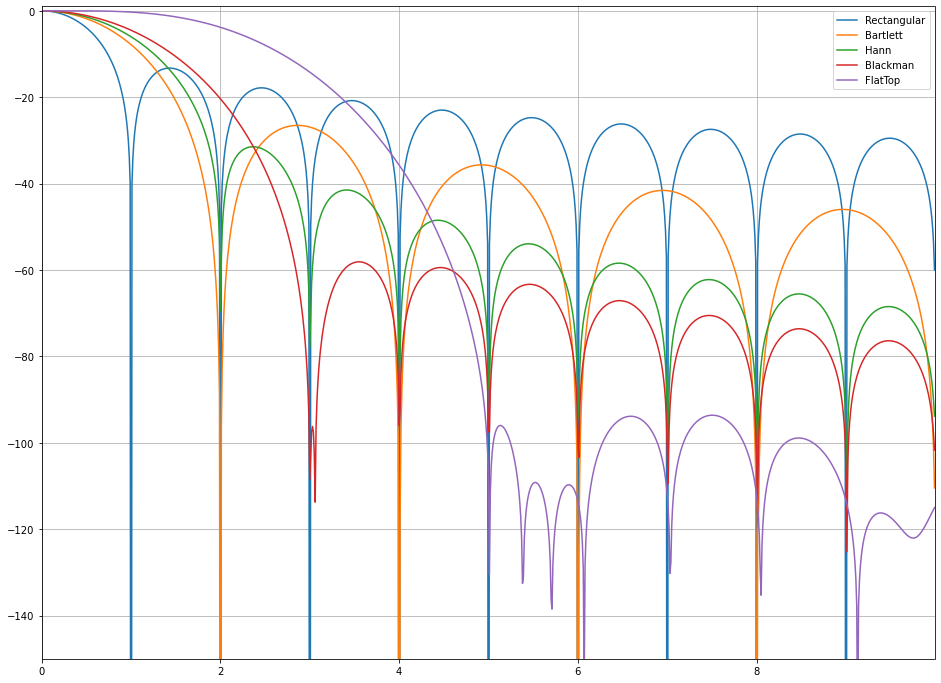

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
from scipy.fft import fft, fftshift, fftfreq


N = 1000;
fs = 1000
zero_padd = 99

Rectangular = np.ones(N)
Bartlett    = sig.windows.bartlett(N)
Hann        = sig.windows.hann(N)
Blackman    = sig.windows.blackman(N)              
FlatTop     = sig.windows.flattop(N)

Rectangular = np.append(Rectangular,np.zeros(zero_padd*N))
Bartlett = np.append(Bartlett,np.zeros(zero_padd*N))
Hann = np.append(Hann,np.zeros(zero_padd*N))
Blackman = np.append(Blackman,np.zeros(zero_padd*N))
FlatTop = np.append(FlatTop,np.zeros(zero_padd*N))

fft_Rectangular = fft(Rectangular)/Rectangular.shape[0]
fft_Bartlett = fft(Bartlett)/Bartlett.shape[0]
fft_Hann = fft(Hann)/Hann.shape[0] 
fft_Blackman = fft(Blackman)/Blackman.shape[0] 
fft_FlatTop = fft(FlatTop)/Blackman.shape[0] 

ff = np.arange(0, fs, 1/(zero_padd+1))

fft_Rectangular_log = 20*np.log10(np.abs(fft_Rectangular)/abs(fft_Rectangular[0])) 
fft_Bartlett_log = 20*np.log10(np.abs(fft_Bartlett)/abs(fft_Bartlett[0]))   
fft_Hann_log = 20*np.log10(np.abs(fft_Hann)/abs(fft_Hann[0]))   
fft_Blackman_log = 20*np.log10(np.abs(fft_Blackman)/abs(fft_Blackman[0]))   
fft_FlatTop_log = 20*np.log10(np.abs(fft_FlatTop)/abs(fft_FlatTop[0]))   

ff_aux = ff < 10

fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True)
fig.set_size_inches(16,12)
ax.plot(ff[ff_aux], fft_Rectangular_log[ff_aux], label = "Rectangular")
ax.plot(ff[ff_aux], fft_Bartlett_log[ff_aux], label = "Bartlett")
ax.plot(ff[ff_aux], fft_Hann_log[ff_aux], label = "Hann")
ax.plot(ff[ff_aux], fft_Blackman_log[ff_aux], label = "Blackman")
ax.plot(ff[ff_aux], fft_FlatTop_log[ff_aux], label = "FlatTop")

ax.autoscale(enable=True, axis='x', tight=True)
ax.set_ylim([-150, 1])
ax.legend()
ax.grid()

Podemos ver la relacion de compromiso que existe entre las distintas ventanas. Tenemos mas atenuacion para el lobulo secundario, a costa de tardar mas bins en alcanzar ese valor.

A continuacion visualizaremos estas diferencias en un cuadro comparativo, donde:

$\Omega_0$ será la frecuencia del primer cruce por cero, es decir $\lvert \large\omega\small(\Omega_1) \rvert = 0$

$\Omega_1$ aquella frecuencia tal que $\lvert \large\omega\small(\Omega_1) \rvert = \frac{\sqrt{2}}{2} \vee -3$ dB

$W_2$ sera el valor de transferencia máxima de los lóbulos secundarios (expresado en dB)

In [3]:
# Con index me fijo en que posicion del vector se cumple mi condicion
index_Rectangular_w0 = np.where(fft_Rectangular_log[ff_aux] < -100)[0]
index_Rectangular_w1 = np.where(fft_Rectangular_log[ff_aux] < -3)[0]
# Con la posicion encontrada, obtengo el valor de W en el vector de frecuencia
w0_Rectangular = ff[index_Rectangular_w0]
w1_Rectangular = ff[index_Rectangular_w1]

index_Bartlett_w0 = np.where(fft_Bartlett_log[ff_aux] < -100)[0]
index_Bartlett_w1 = np.where(fft_Bartlett_log[ff_aux] < -3)[0]
w0_Bartlett = ff[index_Bartlett_w0]
w1_Bartlett = ff[index_Bartlett_w1]

index_Hann_w0 = np.where(fft_Hann_log[ff_aux] < -65)[0]
index_Hann_w1 = np.where(fft_Hann_log[ff_aux] < -3)[0]
w0_Hann = ff[index_Hann_w0]
w1_Hann = ff[index_Hann_w1]

index_Blackman_w0 = np.where(fft_Blackman_log[ff_aux] < -100)[0]
index_Blackman_w1 = np.where(fft_Blackman_log[ff_aux] < -3)[0]
w0_Blackman = ff[index_Blackman_w0]
w1_Blackman = ff[index_Blackman_w1]

index_FlatTop_w0 = np.where(fft_FlatTop_log[ff_aux] < -105)[0]
index_FlatTop_w1 = np.where(fft_FlatTop_log[ff_aux] < -3)[0]
w0_FlatTop = ff[index_FlatTop_w0]
w1_FlatTop = ff[index_FlatTop_w1]


# Secciono el vector logaritmado desde el primer 0 hasta la el largo/10.
# Esto lo hago asi porque despues empieza a crecer la amplitud por estar espejado
# la fft

Vec = fft_Rectangular_log[index_Rectangular_w0[0]+1:int(len(fft_Rectangular_log)/10)]

# Me guardo el valor de amplitud del segundo lobulo
max_Rectangular = max(Vec)

# Veo en que posicion del vector se encuentrra ese maximo
index_max_Rectangular = np.where(fft_Rectangular_log == max_Rectangular)[0]
# Veo que valor de frecuencia corresponde a ese index
w2_Rectangular = ff[index_max_Rectangular]

# Para los siguientes es lo mismo pero mas comprimido
max_Bartlett = max(fft_Bartlett_log[index_Bartlett_w0[0]+1:int(len(fft_Bartlett_log)/10)])
index_max_Bartlett = np.where(fft_Bartlett_log == max_Bartlett)[0]
w2_Bartlett = ff[index_max_Bartlett]

max_Hann = max(fft_Hann_log[index_Hann_w0[0]+1:int(len(fft_Hann_log)/10)])
index_max_Hann = np.where(fft_Hann_log == max_Hann)[0]
w2_Hann = ff[index_max_Hann]

max_Blackman = max(fft_Blackman_log[index_Blackman_w0[0]+1:int(len(fft_Blackman_log)/10)])
index_max_Blackman = np.where(fft_Blackman_log == max_Blackman)[0]
w2_Blackman = ff[index_max_Blackman]

max_FlatTop = max(fft_FlatTop_log[index_FlatTop_w0[0]+1:int(len(fft_FlatTop_log)/10)])
index_max_FlatTop = np.where(fft_FlatTop_log == max_FlatTop)[0]
w2_FlatTop = ff[index_max_FlatTop]

In [10]:
import pandas
from pandas import DataFrame
from IPython.display import HTML

#                      SESGO,             VARIANZA 
tus_resultados_slice = [ 
                           [w0_Rectangular[0], w1_Rectangular[0], w2_Rectangular[0]], # <-- Rectangular  Slice 
                           [w0_Bartlett[0], w1_Bartlett[0], w2_Bartlett[0]], # <-- Bartlett     Slice
                           [w0_Hann[0], w1_Hann[0], w2_Hann[0]], # <-- Hann         Slice
                           [w0_Blackman[0], w1_Blackman[0], w2_Blackman[0]], # <-- Blackman     Slice
                           [w0_FlatTop[0], w1_FlatTop[0], w2_FlatTop[0]], # <-- FlatTop      Slice
                 ]
df_slice = DataFrame(tus_resultados_slice, columns=['$\Omega_0$', '$\Omega_1$', '$W_2$'],
               index=[  
                        'Rectangular',
                        'Bartlett',
                        'Hann',
                        'Blackman',
                        'Flat-top',
                     ])

#pandas.set_option('display.max_colwidth', 1)
HTML(df_slice.to_html(col_space = '200px', justify = 'center'))

,$\Omega_0$,$\Omega_1$,$W_2$
Rectangular,1.0,0.45,1.43
Bartlett,2.0,0.64,2.86
Hann,2.0,0.72,2.36
Blackman,3.0,0.83,3.55
Flat-top,5.0,1.87,18.49
